In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyvista as pv 
import pandas as pd
import os

Silhouette Score for K-Means Clustering: 0.26


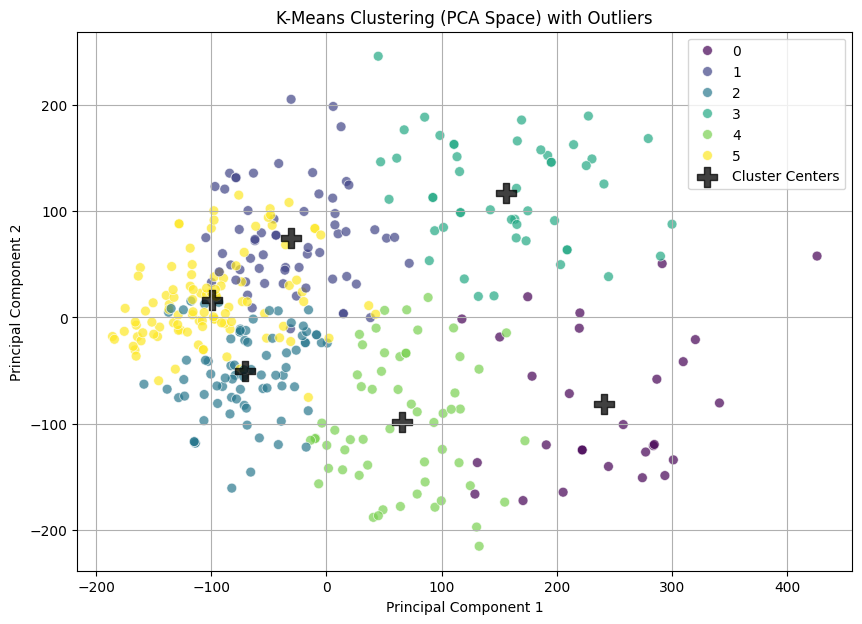

Outlier Mesh Files:
493.npy


In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import mahalanobis
from scipy.stats import zscore
import seaborn as sns
from sklearn.metrics import silhouette_score

# Directory containing saved occupancy grids
occupancy_dir = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_Occupancy_Grids/"

# Load all occupancy grids
occupancy_files = [f for f in os.listdir(occupancy_dir) if f.endswith(".npy")]
occupancy_data = []

# Find the largest grid shape
max_shape = (0, 0, 0)  # Placeholder for (x, y, z) dimensions
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(max_shape, grid.shape))

# Function to pad grids to max_shape
def pad_grid(grid, max_shape):
    pad_width = [(0, max_s - s) for s, max_s in zip(grid.shape, max_shape)]
    return np.pad(grid, pad_width, mode='constant', constant_values=0)

# Load and pad grids
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    padded_grid = pad_grid(grid, max_shape)
    occupancy_data.append(padded_grid.flatten())  # Flatten to 1D vector

occupancy_data = np.array(occupancy_data)  # Convert to 2D NumPy array

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 3D for visualization
principal_components = pca.fit_transform(occupancy_data)

# ------ K-Means Clustering ------
n_clusters = 6  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(principal_components)

# Calculate Silhouette Score
sil_score = silhouette_score(principal_components, kmeans_labels)
print(f"Silhouette Score for K-Means Clustering: {sil_score:.2f}")

# ------ Outlier Detection using Mahalanobis Distance ------
cov_matrix = np.cov(principal_components.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vec = np.mean(principal_components, axis=0)

mahal_distances = np.array([
    mahalanobis(pc, mean_vec, inv_cov_matrix) for pc in principal_components
])

# Set threshold for outliers (Z-score > 3)
threshold = 3
z_scores = zscore(mahal_distances)
outliers = np.where(np.abs(z_scores) > threshold)[0]

# ------ Visualizations ------
plt.figure(figsize=(10, 7))

# PCA + KMeans
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=kmeans_labels, palette="viridis", s=50, alpha=0.7)
#plt.scatter(principal_components[outliers, 0], principal_components[outliers, 1], color="red", marker="x", s=100, label="Outliers")

# Plot K-Means cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='P', label="Cluster Centers")

plt.title("K-Means Clustering (PCA Space) with Outliers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

# Optionally save the plot
plt.savefig("kmeans_pca_clustering.png")
plt.show()

# Print detected outlier file names
print("Outlier Mesh Files:")
for i in outliers:
    print(occupancy_files[i])


Silhouette Score for K-Means Clustering: 0.30

Cluster 0 contains 263 files:
  257.npy
  519.npy
  121.npy
  135.npy
  20.npy
  34.npy
  323.npy
  337.npy
  479.npy
  486.npy
  336.npy
  322.npy
  35.npy
  21.npy
  108.npy
  134.npy
  120.npy
  281.npy
  295.npy
  518.npy
  524.npy
  256.npy
  240.npy
  254.npy
  268.npy
  297.npy
  136.npy
  122.npy
  23.npy
  320.npy
  446.npy
  308.npy
  485.npy
  484.npy
  309.npy
  321.npy
  447.npy
  335.npy
  22.npy
  123.npy
  296.npy
  282.npy
  269.npy
  255.npy
  533.npy
  279.npy
  245.npy
  523.npy
  133.npy
  319.npy
  325.npy
  494.npy
  495.npy
  324.npy
  456.npy
  318.npy
  33.npy
  293.npy
  536.npy
  534.npy
  520.npy
  246.npy
  285.npy
  124.npy
  130.npy
  25.npy
  19.npy
  440.npy
  454.npy
  483.npy
  497.npy
  496.npy
  482.npy
  441.npy
  30.npy
  131.npy
  125.npy
  247.npy
  234.npy
  552.npy
  546.npy
  220.npy
  630.npy
  80.npy
  94.npy
  181.npy
  369.npy
  427.npy
  4.npy
  194.npy
  95.npy
  81.npy
  631.npy
  625.npy

/var/folders/j3/nf3_zjf95vb6pp_w3_1bds0w0000gn/T/ipykernel_37306/3206124934.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], palette="viridis", s=50, alpha=0.7)


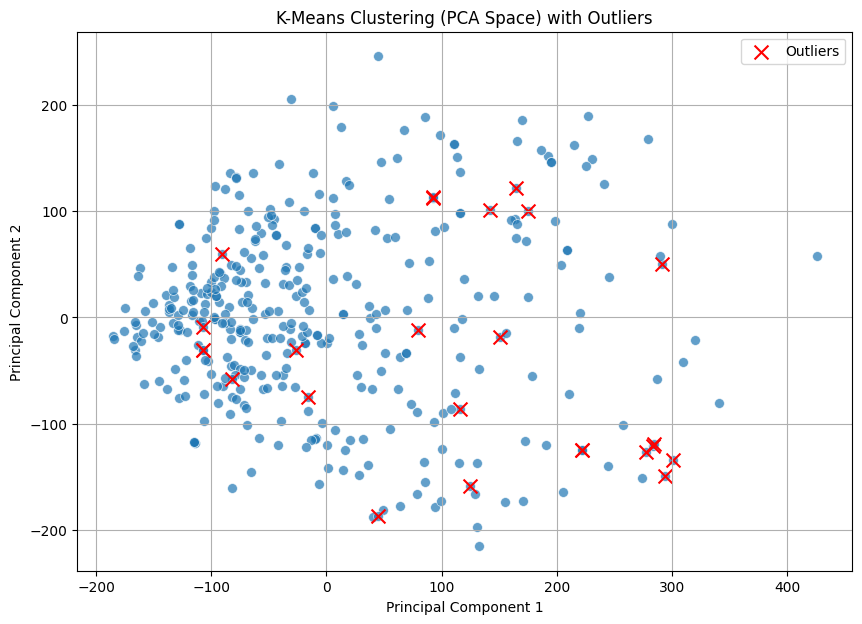

In [75]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import mahalanobis
from scipy.stats import zscore
import seaborn as sns
from sklearn.metrics import silhouette_score

# Directory containing saved occupancy grids
occupancy_dir = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_Occupancy_Grids/"

# Load all occupancy grids
occupancy_files = [f for f in os.listdir(occupancy_dir) if f.endswith(".npy")]
occupancy_data = []

# Find the largest grid shape
max_shape = (0, 0, 0)  # Placeholder for (x, y, z) dimensions
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(max_shape, grid.shape))

# Function to pad grids to max_shape
def pad_grid(grid, max_shape):
    pad_width = [(0, max_s - s) for s, max_s in zip(grid.shape, max_shape)]
    return np.pad(grid, pad_width, mode='constant', constant_values=0)

# Load and pad grids
for file in occupancy_files:
    grid = np.load(os.path.join(occupancy_dir, file))
    padded_grid = pad_grid(grid, max_shape)
    occupancy_data.append(padded_grid.flatten())  # Flatten to 1D vector

occupancy_data = np.array(occupancy_data)  # Convert to 2D NumPy array

# Perform PCA
pca = PCA(n_components=10)  # Reduce to 3D for visualization
principal_components = pca.fit_transform(occupancy_data)

# ------ K-Means Clustering ------
n_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(principal_components)

# Calculate Silhouette Score
sil_score = silhouette_score(principal_components, kmeans_labels)
print(f"Silhouette Score for K-Means Clustering: {sil_score:.2f}")

# ------ Outlier Detection using Mahalanobis Distance ------
cov_matrix = np.cov(principal_components.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vec = np.mean(principal_components, axis=0)

mahal_distances = np.array([
    mahalanobis(pc, mean_vec, inv_cov_matrix) for pc in principal_components
])

# Set threshold for outliers (Z-score > 3)
threshold = 1.5
z_scores = zscore(mahal_distances)
outliers = np.where(np.abs(z_scores) > threshold)[0]

# ------ Group Files by Cluster ------
clustered_files = {i: [] for i in range(n_clusters)}
for i, file in enumerate(occupancy_files):
    cluster = kmeans_labels[i]
    clustered_files[cluster].append(file)

# Print files in each cluster
for cluster, files in clustered_files.items():
    print(f"\nCluster {cluster} contains {len(files)} files:")
    for file in files:
        print(f"  {file}")

# Print detected outlier file names
#print(outliers)
print("\nOutlier Mesh Files:")
for i in outliers:
    print(occupancy_files[i])

# ------ Visualizations ------
plt.figure(figsize=(10, 7))

# PCA + KMeans
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], palette="viridis", s=50, alpha=0.7)
plt.scatter(principal_components[outliers, 0], principal_components[outliers, 1], color="red", marker="x", s=100, label="Outliers")

# Plot K-Means cluster centers
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='P', label="Cluster Centers")

plt.title("K-Means Clustering (PCA Space) with Outliers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

# Optionally save the plot
#plt.savefig("kmeans_pca_clustering.png")
plt.show()


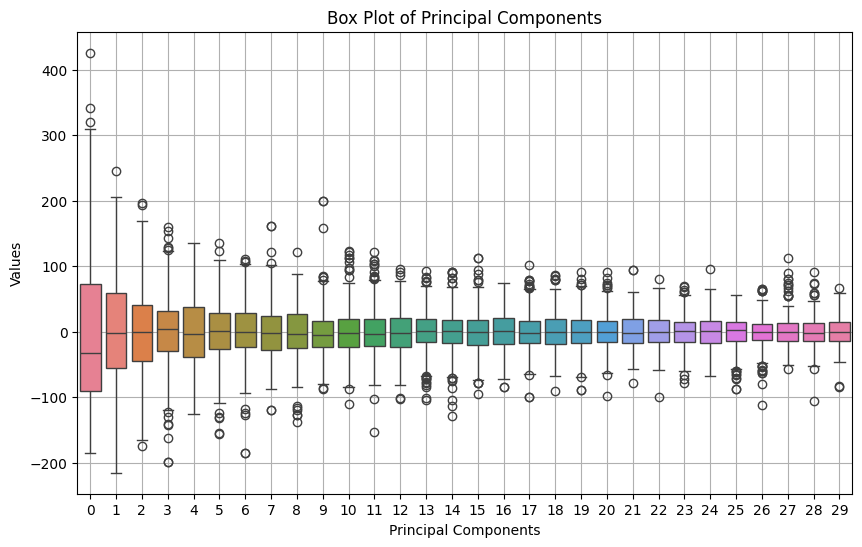

In [73]:
# Create a Box Plot of the Principal Components
plt.figure(figsize=(10, 6))
sns.boxplot(data=principal_components)
plt.xlabel("Principal Components")
plt.ylabel("Values")
plt.title("Box Plot of Principal Components")
plt.grid(True)
plt.show()

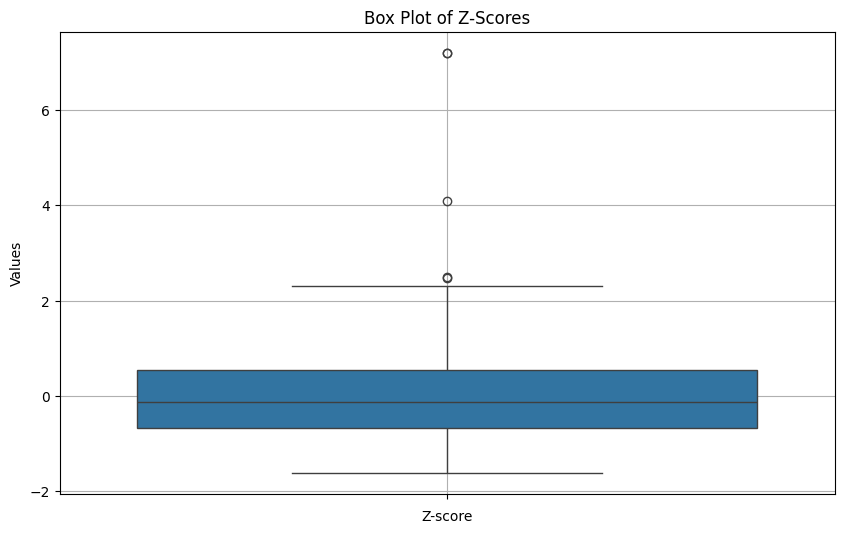

In [77]:
# Create a Box Plot of the Principal Components
plt.figure(figsize=(10, 6))
sns.boxplot(data=z_scores)
plt.xlabel("Z-score")
plt.ylabel("Values")
plt.title("Box Plot of Z-Scores")
plt.grid(True)
plt.show()

In [76]:
mesh_dir = '/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/'
outlier_files = [occupancy_files[i] for i in outliers]
print(len(outlier_files))
print("\nOutlier Mesh Files:")
for file in outlier_files:
    print(file)

plotter = pv.Plotter()
#colors = pv.get_cmap("coolwarm", len(outlier_files))  # Assign different colors

for i, file in enumerate(outlier_files):
    mesh_file = os.path.splitext(file)[0] + ".obj"  # Match with .obj filenames
    mesh_path = os.path.join(mesh_dir, mesh_file)
    
    if os.path.exists(mesh_path):
        mesh = pv.read(mesh_path)
        plotter.add_mesh(mesh, opacity=0.5, show_edges=True)
        plotter.add_text(f"Outlier {i+1}", font_size=10)

plotter.show()

25

Outlier Mesh Files:
493.npy
297.npy
27.npy
252.npy
291.npy
290.npy
552.npy
383.npy
382.npy
197.npy
140.npy
92.npy
87.npy
386.npy
387.npy
413.npy
412.npy
400.npy
289.npy
29.npy
248.npy
462.npy
488.npy
461.npy
514.npy


Widget(value='<iframe src="http://localhost:62706/index.html?ui=P_0x3b90f2d20_64&reconnect=auto" class="pyvist…

In [70]:
mesh = pv.read('/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/113.obj')

mesh.plot(mesh)

Widget(value='<iframe src="http://localhost:62706/index.html?ui=P_0x321bdd760_62&reconnect=auto" class="pyvist…